In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Ed Sheeran - Shape of You (Official Music Video).csv", on_bad_lines='skip', encoding='utf-8', engine='python')

In [4]:
df

,row_number,original_comment,translated_comment
0,3,😮😮,😮😮
1,9,From a street artist to everyone’s favourite ❤,From a street artist to everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,Is anyone Vietnamese watching? 😁
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,Ye song anytime suna jne vala h all time fav
4,19,Love from Bangladesh ❤😂,Love from Bangladesh 😂
...,...,...,...
17944,49986,Я невиннаа вадик ааа❤❤,I'm innocent Vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,Almost 6 years but this song feels like it jus...
17946,49995,8th April 2023..let's see how many legends are...,8th April 2023lets see how many legends are wa...
17947,49996,🔥🔥🔥,🔥🔥🔥


In [5]:
mapping=pd.read_csv("Mapping2.csv")

In [6]:
mapping

,Unnamed: 0,emoji,label
0,0,❤,0
1,1,🇧,1
2,2,🇮,2
3,3,🎉,3
4,4,🎧,4
5,5,🎵,5
6,6,🎶,6
7,7,👀,7
8,8,👇,8
9,9,👌,9


In [7]:
import re
def remove_emojis_and_check(comment):
    # Ensure the comment is a string (handle NaN, None, or non-string values)
    if not isinstance(comment, str):
        return None
    
    # Remove any emoji using a general emoji pattern
    # This regex matches all emojis
    emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F'  # Emoticons
                               r'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
                               r'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
                               r'\U0001F700-\U0001F77F'  # Alchemical Symbols
                               r'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
                               r'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
                               r'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
                               r'\U0001FA00-\U0001FA6F'  # Chess Symbols
                               r'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
                               r'\U00002702-\U000027B0'  # Miscellaneous Symbols
                               r'\U000024C2-\U0001F251'  # Enclosed characters
                               r']', flags=re.UNICODE)

    # Remove emojis from the comment
    cleaned_comment = re.sub(emoji_pattern, '', comment)

    # If the cleaned comment is empty or just spaces, return None to drop the row
    if not cleaned_comment.strip():
        return None
    
    return cleaned_comment

In [8]:
df['translated_comment'] = df['translated_comment'].apply(remove_emojis_and_check)

In [9]:
df

,row_number,original_comment,translated_comment
0,3,😮😮,None
1,9,From a street artist to everyone’s favourite ❤,From a street artist to everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,Is anyone Vietnamese watching?
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,Ye song anytime suna jne vala h all time fav
4,19,Love from Bangladesh ❤😂,Love from Bangladesh
...,...,...,...
17944,49986,Я невиннаа вадик ааа❤❤,I'm innocent Vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,Almost 6 years but this song feels like it jus...
17946,49995,8th April 2023..let's see how many legends are...,8th April 2023lets see how many legends are wa...
17947,49996,🔥🔥🔥,None


In [10]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
1,9,From a street artist to everyone’s favourite ❤,From a street artist to everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,Is anyone Vietnamese watching?
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,Ye song anytime suna jne vala h all time fav
4,19,Love from Bangladesh ❤😂,Love from Bangladesh
5,20,Anyone here in 2050 💀,Anyone here in 2050
...,...,...,...
17943,49984,6 years passed. 6 billion views. This song is ...,6 years passed 6 billion views This song is st...
17944,49986,Я невиннаа вадик ааа❤❤,I'm innocent Vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,Almost 6 years but this song feels like it jus...
17946,49995,8th April 2023..let's see how many legends are...,8th April 2023lets see how many legends are wa...


In [11]:
import string
def tweet_clean(tweet):
    tweet = str(tweet).lower()
    # remove @mentions
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    
    # remove RT
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention) 
    
    # remove hyperlinks
    rm_links = re.sub(r'http\S+', '', rm_rt)                               
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    
    # remove numbers
    rm_nums = re.sub('[0-9]+', '', rm_links)         
    
    # remove punctuations
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [12]:
df["translated_comment"] = df["translated_comment"].apply(tweet_clean)
df

,row_number,original_comment,translated_comment
1,9,From a street artist to everyone’s favourite ❤,from a street artist to everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,is anyone vietnamese watching
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,ye song anytime suna jne vala h all time fav
4,19,Love from Bangladesh ❤😂,love from bangladesh
5,20,Anyone here in 2050 💀,anyone here in
...,...,...,...
17943,49984,6 years passed. 6 billion views. This song is ...,years passed billion views this song is stil...
17944,49986,Я невиннаа вадик ааа❤❤,im innocent vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,almost years but this song feels like it just...
17946,49995,8th April 2023..let's see how many legends are...,th april lets see how many legends are watchin...


In [13]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
1,9,From a street artist to everyone’s favourite ❤,from a street artist to everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,is anyone vietnamese watching
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,ye song anytime suna jne vala h all time fav
4,19,Love from Bangladesh ❤😂,love from bangladesh
5,20,Anyone here in 2050 💀,anyone here in
...,...,...,...
17943,49984,6 years passed. 6 billion views. This song is ...,years passed billion views this song is stil...
17944,49986,Я невиннаа вадик ааа❤❤,im innocent vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,almost years but this song feels like it just...
17946,49995,8th April 2023..let's see how many legends are...,th april lets see how many legends are watchin...


In [14]:
df=df[df['translated_comment']!='']
df

,row_number,original_comment,translated_comment
1,9,From a street artist to everyone’s favourite ❤,from a street artist to everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,is anyone vietnamese watching
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,ye song anytime suna jne vala h all time fav
4,19,Love from Bangladesh ❤😂,love from bangladesh
5,20,Anyone here in 2050 💀,anyone here in
...,...,...,...
17943,49984,6 years passed. 6 billion views. This song is ...,years passed billion views this song is stil...
17944,49986,Я невиннаа вадик ааа❤❤,im innocent vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,almost years but this song feels like it just...
17946,49995,8th April 2023..let's see how many legends are...,th april lets see how many legends are watchin...


In [15]:
df=df[df['translated_comment']!=' ']
df

,row_number,original_comment,translated_comment
1,9,From a street artist to everyone’s favourite ❤,from a street artist to everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,is anyone vietnamese watching
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,ye song anytime suna jne vala h all time fav
4,19,Love from Bangladesh ❤😂,love from bangladesh
5,20,Anyone here in 2050 💀,anyone here in
...,...,...,...
17943,49984,6 years passed. 6 billion views. This song is ...,years passed billion views this song is stil...
17944,49986,Я невиннаа вадик ааа❤❤,im innocent vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,almost years but this song feels like it just...
17946,49995,8th April 2023..let's see how many legends are...,th april lets see how many legends are watchin...


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(tweet):
    # Tokenize the tweet into words
    words = word_tokenize(tweet)

    # Get the English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tweet
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_tweet = ' '.join(filtered_words)

    return filtered_tweet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df["translated_comment"] = df["translated_comment"].apply(remove_stopwords)
df

,row_number,original_comment,translated_comment
1,9,From a street artist to everyone’s favourite ❤,street artist everyones favourite
2,10,Có ai là người Việt Nam đang xem ko 😁,anyone vietnamese watching
3,18,Ye song anytime suna jne vala h all time fav. ❤❤,ye song anytime suna jne vala h time fav
4,19,Love from Bangladesh ❤😂,love bangladesh
5,20,Anyone here in 2050 💀,anyone
...,...,...,...
17943,49984,6 years passed. 6 billion views. This song is ...,years passed billion views song still playlist
17944,49986,Я невиннаа вадик ааа❤❤,im innocent vadik aaa
17945,49989,Almost 6 years but this song feels like it jus...,almost years song feels like released
17946,49995,8th April 2023..let's see how many legends are...,th april lets see many legends watching master...


In [18]:
X = df["translated_comment"].values

In [19]:
X = X.reshape(-1,)
X.shape

(12288,)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [21]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['street artist everyones favourite' 'anyone vietnamese watching'
 'ye song anytime suna jne vala h time fav' 'love bangladesh' 'anyone'
 'kk' 'iam bangladesh love song' 'cool' 'masterpiece'
 'like someone special song'] 

Sequences


[[1704, 348, 615, 69],
 [3, 366, 8],
 [616, 1, 529, 865, 1705, 1706, 477, 36, 112],
 [2, 75],
 [3],
 [1147],
 [189, 75, 2, 1],
 [89],
 [9],
 [6, 41, 435, 1]]

In [22]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(100,110):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  100 ----> want
Index:  101 ----> legendary
Index:  102 ----> omg
Index:  103 ----> lol
Index:  104 ----> heard
Index:  105 ----> end
Index:  106 ----> remember
Index:  107 ----> hit
Index:  108 ----> forever
Index:  109 ----> times


In [23]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 4656


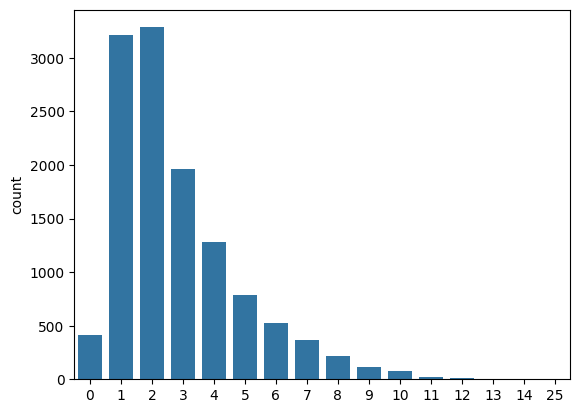

In [24]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [25]:
from tensorflow.keras.utils import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [26]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[1704, 348, 615, 69]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 1704  348  615   69]]


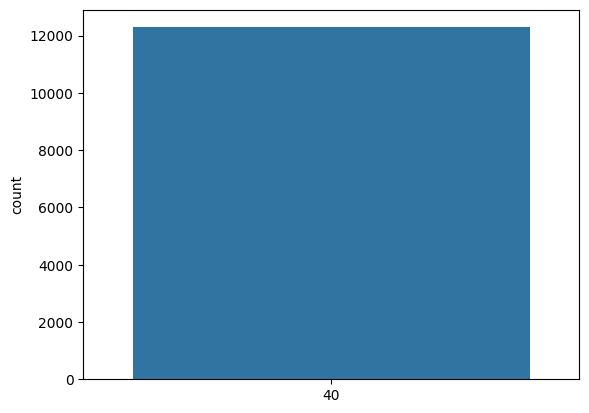

In [27]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [28]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [29]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = 21613  # Match the saved model's vocabulary size
seq_len = 40
embed_len = 128

# Rebuild the model architecture
model = Sequential()
model.add(Embedding(vocabulary_size, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation="softmax"))

# Build the model
model.build(input_shape=(None, seq_len))  # None for batch size

# Load weights
model.load_weights('BTP_eval.weights.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 40, 128)             │       2,766,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 40, 200)             │         183,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 40, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 200)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,221,352 (12.29 MB)

 Trainable params: 3,221,352 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
def sequences_to_text(sequences, tokenizer):
    return [' '.join([tokenizer.index_word.get(i, '') for i in seq if i != 0]) for seq in sequences]

# Assuming 'model' is your trained model and 'y_pred' contains the predicted class indices
# 1. Rebuild the original comments from tokenized sequences
reconstructed_comments = sequences_to_text(X_seqs_pd, tokenizer)

# 2. Get the predicted labels (e.g., if model output is class indices)
y_pred = model.predict(X_seqs_pd)
y_pred_class = np.argmax(y_pred, axis=1)  # Use this if model output is probabilities

# 3. Create a DataFrame
result_df = pd.DataFrame({
    'translated_comment': reconstructed_comments,
    'predicted_label': y_pred_class
})

384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


In [31]:
result_df

,translated_comment,predicted_label
0,street artist everyones favourite,32
1,anyone vietnamese watching,30
2,ye song anytime suna jne vala h time fav,17
3,love bangladesh,27
4,anyone,7
...,...,...
12283,years passed billion views song still playlist,35
12284,im innocent vadik aaa,28
12285,almost years song feels like released,24
12286,th april lets see many legends watching master...,30


In [32]:
number_to_emoji = dict(zip(mapping['label'], mapping['emoji']))

# Assuming 'result_df' is your DataFrame with 'actual_label' and 'predicted_label' columns containing label numbers
result_df['predicted_label_emoji'] = result_df['predicted_label'].map(number_to_emoji)

# Display the updated DataFrame
compare_df=result_df[['translated_comment', 'predicted_label_emoji']]
compare_df

,translated_comment,predicted_label_emoji
0,street artist everyones favourite,😮
1,anyone vietnamese watching,😢
2,ye song anytime suna jne vala h time fav,🔥
3,love bangladesh,😎
4,anyone,👀
...,...,...
12283,years passed billion views song still playlist,🙏
12284,im innocent vadik aaa,😔
12285,almost years song feels like released,😊
12286,th april lets see many legends watching master...,😢


In [33]:
import numpy as np
from textblob import TextBlob

# Step 1: Assign sentiment values to emojis
emoji_sentiment = {
    "❤": 90, "🇧": 50, "🇮": 50, "🎉": 85, "🎧": 70, "🎵": 75,
    "🎶": 75, "👀": 50, "👇": 30, "👌": 80, "👍": 85, "👏": 88,
    "💀": 20, "💔": 10, "💕": 95, "💖": 95, "💯": 100, "🔥": 80,
    "🕊": 90, "🗿": 40, "😀": 95, "😁": 90, "😂": 85, "😅": 75,
    "😊": 80, "😌": 70, "😍": 95, "😎": 80, "😔": 40, "😘": 85,
    "😢": 30, "😭": 20, "😮": 50, "😳": 45, "🙂": 75, "🙏": 85,
    "🚩": 30, "🤣": 80, "🥰": 90, "🥺": 40
}

In [34]:
def text_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    scaled_sentiment = (polarity + 1) * 50  
    return scaled_sentiment

In [35]:
def calculate_rms(text_sentiment, emoji_sentiment):
    return np.sqrt((text_sentiment ** 2 + emoji_sentiment ** 2) / 2)

In [36]:
def process_row(row):
    text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
    emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
    if emoji_sent_val is not None:
        rms_value = calculate_rms(text_sent_val, emoji_sent_val)  # Calculate RMS
        return text_sent_val, emoji_sent_val, rms_value
    else:
        return text_sent_val, 0, 0  

In [37]:
compare_df[['text_sentiment', 'emoji_sentiment', 'rms']] = compare_df.apply(process_row, axis=1, result_type='expand')
compare_df

,translated_comment,predicted_label_emoji,text_sentiment,emoji_sentiment,rms
0,street artist everyones favourite,😮,50.0,50.0,50.000000
1,anyone vietnamese watching,😢,50.0,30.0,41.231056
2,ye song anytime suna jne vala h time fav,🔥,50.0,80.0,66.708320
3,love bangladesh,😎,75.0,80.0,77.540312
4,anyone,👀,50.0,50.0,50.000000
...,...,...,...,...,...
12283,years passed billion views song still playlist,🙏,50.0,85.0,69.731628
12284,im innocent vadik aaa,😔,75.0,40.0,60.104076
12285,almost years song feels like released,😊,50.0,80.0,66.708320
12286,th april lets see many legends watching master...,😢,75.0,30.0,57.118298


In [38]:
def calculate_rms_for_dataframe(df):
    squared_differences = []
    for index, row in df.iterrows():
        text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
        emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
        if emoji_sent_val is not None:
            rms_value = np.sqrt((text_sent_val ** 2 + emoji_sent_val ** 2) / 2)
            squared_differences.append(rms_value)
    
    # Calculate RMS
    rms = np.mean(squared_differences)
    return rms

In [39]:
overall_rms = calculate_rms_for_dataframe(compare_df)
overall_rms

62.957451386300214

In [40]:
rmse_df = pd.DataFrame({'Dataframe Title': ['Ed Sheeran - Shape of You '],
                        'RMSE': [overall_rms]})
rmse_df

,Dataframe Title,RMSE
0,Ed Sheeran - Shape of You,62.957451


In [41]:
import os

# Check if the CSV file exists
csv_filename = 'sentiment_results.csv'

# If the CSV file exists, append the new RMSE value, otherwise create a new CSV
if os.path.exists(csv_filename):
    # Append the RMSE to the existing CSV
    rmse_df.to_csv(csv_filename, mode='a', header=False, index=False)
else:
    # Create a new CSV file and write the header along with the RMSE
    rmse_df.to_csv(csv_filename, mode='w', header=True, index=False)

print(f"RMSE values have been saved to {csv_filename}")

RMSE values have been saved to sentiment_results.csv
